In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import requests
from os import getcwd


In [2]:
#data
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
df_covid19_death= pd.read_csv(url, error_bad_lines=False)
df_covid19_death.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
261,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,...,13,13,13,13,14,14,14,14,14,14
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,338,345,348,351,361,364,365,417,424,429
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
264,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,...,53,53,53,54,54,55,55,55,55,56
265,NaN,Lesotho,-29.610000,28.233600,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,3,3


In [3]:
list(df_covid19_death.columns) 
#print(df_covid19_death.dtypes)


['Province/State',
 'Country/Region',
 'Lat',
 'Long',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',


In [4]:
df_covid19_death=df_covid19_death.drop(['Lat', 'Long'], axis=1)


In [5]:
df_covid19_death=df_covid19_death.T
columns_to_change={}
columns_province=df_covid19_death[0:1].values[0]
columns_country=df_covid19_death[1:2].values[0]
for c in df_covid19_death[0:1].columns.values:
    if str(columns_province[int(c)])!='nan':
           columns_to_change[c]=str(columns_country[int(c)])+'-' + str(columns_province[int(c)])
    else:
          columns_to_change[c]=str(columns_country[int(c)])
# columns_to_replace

df_covid19_death=df_covid19_death.rename(columns=columns_to_change)
df_covid19_death=df_covid19_death.drop(['Province/State', 'Country/Region'])
df_covid19_death.index=pd.to_datetime(df_covid19_death.index)

df_covid19_death.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia-Australian Capital Territory,Australia-New South Wales,...,Malawi,United Kingdom-Falkland Islands (Malvinas),France-Saint Pierre and Miquelon,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
url_test="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df_covid19_test= pd.read_csv(url_test, error_bad_lines=False)


df_covid19_test.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,858,861
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,346,346,386,386,396,458,462,506,525,541


In [7]:
df_covid19_test=df_covid19_test.drop(['Lat', 'Long'], axis=1)

In [8]:
df_covid19_test=df_covid19_test.T
columns_to_replace={}
c_province=df_covid19_test[0:1].values[0]
c_countries=df_covid19_test[1:2].values[0]
for c in df_covid19_test[0:1].columns.values:
    if str(c_province[int(c)])!='nan':
           columns_to_replace[c]=str(c_countries[int(c)])+'-' + str(c_province[int(c)])
    else:
           columns_to_replace[c]=str(c_countries[int(c)])
# columns_to_replace

df_covid19_test=df_covid19_test.rename(columns=columns_to_replace)
df_covid19_test=df_covid19_test.drop(['Province/State', 'Country/Region'])
df_covid19_test.index=pd.to_datetime(df_covid19_test.index)

df_covid19_test.head()


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia-Australian Capital Territory,Australia-New South Wales,...,Malawi,United Kingdom-Falkland Islands (Malvinas),France-Saint Pierre and Miquelon,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [9]:
url_recovered="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_covid19_recovered= pd.read_csv(url_recovered, error_bad_lines=False)
df_covid19_recovered.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
248,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,...,268,269,279,283,283,284,284,286,286,286
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,552,575,591,595,619,630,642,659,675,685
250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,266,266,266,272,272,272,296,296,296,302
251,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,...,4858,4914,4965,5011,5067,5115,5176,5228,5278,5332
252,NaN,Lesotho,-29.610000,28.233600,0,0,0,0,0,0,...,11,11,11,11,20,26,26,32,33,48


In [10]:
df_covid19_recovered=df_covid19_recovered.drop(['Lat', 'Long'], axis=1)

In [11]:
df_covid19_recovered=df_covid19_recovered.T
columns_to_change={}
c_province=df_covid19_recovered[0:1].values[0]
c_country=df_covid19_recovered[1:2].values[0]
for c in df_covid19_recovered[0:1].columns.values:
    if str(c_province[int(c)])!='nan':
           columns_to_replace[c]=str(c_countries[int(c)])+'-' + str(c_province[int(c)])
    else:
           columns_to_replace[c]=str(c_countries[int(c)])
# columns_to_replace

df_covid19_recovered=df_covid19_recovered.rename(columns=columns_to_replace)
df_covid19_recovered=df_covid19_recovered.drop(['Province/State', 'Country/Region'])
df_covid19_recovered.index=pd.to_datetime(df_covid19_recovered.index)

df_covid19_test.head()


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia-Australian Capital Territory,Australia-New South Wales,...,Malawi,United Kingdom-Falkland Islands (Malvinas),France-Saint Pierre and Miquelon,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [12]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
# The table we're interested in is the first one read in from the webpage.
df = pd.read_html(url)[0]

df.head()


,Rank,Country (or dependent territory),Population,% of worldpopulation,Date,Source
0,1,China[b],1403540240,NaN,15 Jul 2020,National population clock[3]
1,2,India[c],1364723944,NaN,15 Jul 2020,National population clock[4]
2,3,United States[d],329957441,NaN,15 Jul 2020,National population clock[5]
3,4,Indonesia,269603400,NaN,1 Jul 2020,National annual projection[6]
4,5,Pakistan[e],220892331,NaN,1 Jul 2020,UN Projection[2]


In [13]:
# Rename the relevant column to something more manageable.
df.rename(columns={'Country (or dependent territory)': 'Country'}, inplace=True)
# Get rid of the footnote indicators, "[a]", "[b]", etc.
df['Country'] = df['Country'].str.replace('\[\w\]', '')
df.head()


,Rank,Country,Population,% of worldpopulation,Date,Source
0,1,China,1403540240,NaN,15 Jul 2020,National population clock[3]
1,2,India,1364723944,NaN,15 Jul 2020,National population clock[4]
2,3,United States,329957441,NaN,15 Jul 2020,National population clock[5]
3,4,Indonesia,269603400,NaN,1 Jul 2020,National annual projection[6]
4,5,Pakistan,220892331,NaN,1 Jul 2020,UN Projection[2]


In [14]:
# Set the 'Country' column to be the index.
df.index = df['Country']
df['date']=pd.to_datetime(df.Date)
df.drop(columns=['Rank','% of worldpopulation','Source','Date'],inplace=True)
df.head()


,Country,Population,date
Country,,,
China,China,1403540240,2020-07-15
India,India,1364723944,2020-07-15
United States,United States,329957441,2020-07-15
Indonesia,Indonesia,269603400,2020-07-01
Pakistan,Pakistan,220892331,2020-07-01


In [15]:
populationBycountry=df[df['date']>'2020-1-1']
populationBycountry.head()


,Country,Population,date
Country,,,
China,China,1403540240,2020-07-15
India,India,1364723944,2020-07-15
United States,United States,329957441,2020-07-15
Indonesia,Indonesia,269603400,2020-07-01
Pakistan,Pakistan,220892331,2020-07-01


In [16]:
PopulationByCountry_m=(populationBycountry[['Population']]/1000000).to_dict()['Population']

In [17]:
PopulationByCountry_m['US']=PopulationByCountry_m['United States']
PopulationByCountry_m


{'China': 1403.54024,
 'India': 1364.723944,
 'United States': 329.957441,
 'Indonesia': 269.6034,
 'Pakistan': 220.892331,
 'Brazil': 211.795665,
 'Nigeria': 206.139587,
 'Bangladesh': 168.957024,
 'Mexico': 127.792286,
 'Japan': 125.93,
 'Philippines': 108.895083,
 'Egypt': 100.620458,
 'DR Congo': 89.561404,
 'Iran': 83.614796,
 'France': 67.081,
 'Thailand': 66.528905,
 'South Africa': 59.62235,
 'South Korea': 51.780579,
 'Colombia': 50.372424,
 'Argentina': 45.376763,
 'Sudan': 42.66718,
 'Ukraine': 41.806221,
 'Uganda': 41.5903,
 'Iraq': 40.1502,
 'Poland': 38.379,
 'Canada': 38.100742,
 'Morocco': 35.95699,
 'Uzbekistan': 34.297085,
 'Afghanistan': 32.890171,
 'Malaysia': 32.84176,
 'Nepal': 29.996478,
 'Yemen': 29.825968,
 'Venezuela': 28.435943,
 'Cameroon': 26.545864,
 'Ivory Coast': 26.453542,
 'Australia': 25.772309,
 'Taiwan': 23.586562,
 'Niger': 23.196002,
 'Mali': 20.250833,
 'Chile': 19.45831,
 'Malawi': 19.129952,
 'Kazakhstan': 18.738536,
 'Zambia': 17.885422,
 'Ecu

In [18]:
Country=['US','Brazil','Colombia','Venezuela']
covid19_death_bycountry=df_covid19_death[Country].copy()
covid19_death_bycountry.tail()


,US,Brazil,Colombia,Venezuela
2020-07-10,134092,70398,4985,83
2020-07-11,134777,71469,5202,85
2020-07-12,135205,72100,5426,89
2020-07-13,135566,72833,5634,93
2020-07-14,136466,74133,5787,96


In [19]:
covid19_test_bycountry=df_covid19_test[Country].copy()
covid19_test_bycountry.tail()


,US,Brazil,Colombia,Venezuela
2020-07-10,3184573,1800827,133973,8803
2020-07-11,3245925,1839850,140776,9178
2020-07-12,3304942,1864681,145362,9465
2020-07-13,3364157,1884967,150445,9707
2020-07-14,3431574,1926824,154277,10010


In [20]:
covid19_recovered_bycountry=df_covid19_recovered[Country].copy()
covid19_recovered_bycountry.tail()


,US,Brazil,Colombia,Venezuela
2020-07-10,983185,3037,8208,2671
2020-07-11,995576,3078,8227,2671
2020-07-12,1006326,3115,8247,2671
2020-07-13,1031939,3179,8373,2671
2020-07-14,1049098,3179,8441,2671


In [21]:
for c in covid19_death_bycountry.columns:
    print(PopulationByCountry_m[c])
    covid19_death_bycountry[c+'_case1M']=covid19_death_bycountry[c]/PopulationByCountry_m[c]


329.957441
211.795665
50.372424
28.435943


In [22]:
for c in covid19_test_bycountry.columns:
    print(PopulationByCountry_m[c])
    covid19_test_bycountry[ c+'_case1M']=covid19_test_bycountry[c]/PopulationByCountry_m[c]


329.957441
211.795665
50.372424
28.435943


In [23]:
for c in covid19_recovered_bycountry.columns:
    print(PopulationByCountry_m[c])
    covid19_recovered_bycountry[c+'_case1M']=covid19_recovered_bycountry[c]/PopulationByCountry_m[c]


329.957441
211.795665
50.372424
28.435943


In [24]:
covid19_death_bycountry_M=covid19_death_bycountry.copy()
for c in covid19_death_bycountry.columns:
     covid19_death_bycountry_M[c+ '_pchg']=covid19_death_bycountry_M[c].pct_change(1)
covid19_death_bycountry_M.dropna(inplace=True)

covid19_death_bycountry_M.head()


,US,Brazil,Colombia,Venezuela,US_case1M,Brazil_case1M,Colombia_case1M,Venezuela_case1M,US_pchg,Brazil_pchg,Colombia_pchg,Venezuela_pchg,US_case1M_pchg,Brazil_case1M_pchg,Colombia_case1M_pchg,Venezuela_case1M_pchg
2020-03-27,2300,92,6,1,6.9706,0.434381,0.119113,0.0351668,0.317297,0.194805,0.000000,inf,0.317297,0.194805,0.000000,inf
2020-03-28,2934,111,6,2,8.89206,0.52409,0.119113,0.0703335,0.275652,0.206522,0.000000,1.0,0.275652,0.206522,0.000000,1.0
2020-03-29,3561,136,10,2,10.7923,0.642128,0.198521,0.0703335,0.213701,0.225225,0.666667,0.0,0.213701,0.225225,0.666667,0.0
2020-03-30,4381,159,12,3,13.2775,0.750724,0.238226,0.1055,0.230272,0.169118,0.200000,0.5,0.230272,0.169118,0.200000,0.5
2020-03-31,5605,201,16,3,16.987,0.949028,0.317634,0.1055,0.279388,0.264151,0.333333,0.0,0.279388,0.264151,0.333333,0.0


In [25]:
covid19_test_bycountry_M=covid19_test_bycountry.copy()
for c in covid19_test_bycountry.columns:
     covid19_test_bycountry_M[c+ '_pchg']=covid19_test_bycountry_M[c].pct_change(1)
covid19_test_bycountry_M.dropna(inplace=True)

covid19_test_bycountry_M.head()


,US,Brazil,Colombia,Venezuela,US_case1M,Brazil_case1M,Colombia_case1M,Venezuela_case1M,US_pchg,Brazil_pchg,Colombia_pchg,Venezuela_pchg,US_case1M_pchg,Brazil_case1M_pchg,Colombia_case1M_pchg,Venezuela_case1M_pchg
2020-03-14,2870,151,22,2,8.69809,0.712951,0.436747,0.0703335,0.330552,0.000000,0.692308,inf,0.330552,0.000000,0.692308,inf
2020-03-15,2968,162,34,10,8.9951,0.764888,0.674972,0.351668,0.034146,0.072848,0.545455,4.000000,0.034146,0.072848,0.545455,4.000000
2020-03-16,4360,200,54,17,13.2138,0.944306,1.07202,0.597835,0.469003,0.234568,0.588235,0.700000,0.469003,0.234568,0.588235,0.700000
2020-03-17,6141,321,65,33,18.6115,1.51561,1.29039,1.1605,0.408486,0.605000,0.203704,0.941176,0.408486,0.605000,0.203704,0.941176
2020-03-18,8917,372,93,36,27.0247,1.75641,1.84625,1.266,0.452044,0.158879,0.430769,0.090909,0.452044,0.158879,0.430769,0.090909


In [26]:
covid19_recovered_bycountry_M=covid19_recovered_bycountry.copy()
for c in covid19_recovered_bycountry.columns:
     covid19_recovered_bycountry_M[c+ '_pchg']=covid19_recovered_bycountry_M[c].pct_change(1)
covid19_recovered_bycountry_M.dropna(inplace=True)

covid19_recovered_bycountry_M.head()


,US,Brazil,Colombia,Venezuela,US_case1M,Brazil_case1M,Colombia_case1M,Venezuela_case1M,US_pchg,Brazil_pchg,Colombia_pchg,Venezuela_pchg,US_case1M_pchg,Brazil_case1M_pchg,Colombia_case1M_pchg,Venezuela_case1M_pchg
2020-03-22,178,2,6,15,0.539464,0.00944306,0.119113,0.527501,0.011364,0.0,0.000000,inf,0.011364,0.0,0.000000,inf
2020-03-23,178,2,6,15,0.539464,0.00944306,0.119113,0.527501,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
2020-03-24,348,2,10,15,1.05468,0.00944306,0.198521,0.527501,0.955056,0.0,0.666667,0.0,0.955056,0.0,0.666667,0.0
2020-03-25,361,2,10,15,1.09408,0.00944306,0.198521,0.527501,0.037356,0.0,0.000000,0.0,0.037356,0.0,0.000000,0.0
2020-03-26,681,2,10,15,2.0639,0.00944306,0.198521,0.527501,0.886427,0.0,0.000000,0.0,0.886427,0.0,0.000000,0.0


In [27]:
Case=['US_case1M','Brazil_case1M','Colombia_case1M','Venezuela_case1M']
covid19_death_cases1M=covid19_death_bycountry_M[Case].copy()
covid19_death_cases1M.rename(columns={'US_case1M': 'US_Death_Case1M'}, inplace=True)
covid19_death_cases1M.rename(columns={'Brazil_case1M': 'Brazil_Death_Case1M'}, inplace=True)
covid19_death_cases1M.rename(columns={'Colombia_case1M': 'Colombia_Death_Case1M'}, inplace=True)
covid19_death_cases1M.rename(columns={'Venezuela_case1M': 'Venezuela_Death_Case1M'}, inplace=True)
covid19_death_cases1M.tail()


,US_Death_Case1M,Brazil_Death_Case1M,Colombia_Death_Case1M,Venezuela_Death_Case1M
2020-07-10,406.392,332.386,98.9629,2.91884
2020-07-11,408.468,337.443,103.271,2.98917
2020-07-12,409.765,340.422,107.718,3.12984
2020-07-13,410.859,343.883,111.847,3.27051
2020-07-14,413.587,350.021,114.884,3.37601


In [28]:
covid19_test_cases1M=covid19_test_bycountry_M[Case].copy()
covid19_test_cases1M.rename(columns={'US_case1M': 'US_Test_Case1M'}, inplace=True)
covid19_test_cases1M.rename(columns={'Brazil_case1M': 'Brazil_Test_Case1M'}, inplace=True)
covid19_test_cases1M.rename(columns={'Colombia_case1M': 'Colombia_Test_Case1M'}, inplace=True)
covid19_test_cases1M.rename(columns={'Venezuela_case1M': 'Venezuela_Test_Case1M'}, inplace=True)
covid19_test_cases1M.tail()


,US_Test_Case1M,Brazil_Test_Case1M,Colombia_Test_Case1M,Venezuela_Test_Case1M
2020-07-10,9651.47,8502.66,2659.65,309.573
2020-07-11,9837.41,8686.91,2794.7,322.761
2020-07-12,10016.3,8804.15,2885.75,332.853
2020-07-13,10195.7,8899.93,2986.65,341.364
2020-07-14,10400.1,9097.56,3062.73,352.019


In [29]:
covid19_recovered_cases1M=covid19_recovered_bycountry_M[Case].copy()
covid19_recovered_cases1M.rename(columns={'US_case1M': 'US_Recovered_Case1M'}, inplace=True)
covid19_recovered_cases1M.rename(columns={'Brazil_case1M': 'Brazil_Recovered_Case1M'}, inplace=True)
covid19_recovered_cases1M.rename(columns={'Colombia_case1M': 'Colombia_Recovered_Case1M'}, inplace=True)
covid19_recovered_cases1M.rename(columns={'Venezuela_case1M': 'Venezuela_Recovered_Case1M'}, inplace=True)
covid19_recovered_cases1M.tail()


,US_Recovered_Case1M,Brazil_Recovered_Case1M,Colombia_Recovered_Case1M,Venezuela_Recovered_Case1M
2020-07-10,2979.73,14.3393,162.946,93.9304
2020-07-11,3017.29,14.5329,163.323,93.9304
2020-07-12,3049.87,14.7076,163.721,93.9304
2020-07-13,3127.49,15.0098,166.222,93.9304
2020-07-14,3179.49,15.0098,167.572,93.9304


In [30]:
covid19_model_Df=pd.concat([covid19_test_cases1M, covid19_death_cases1M,covid19_recovered_cases1M], axis=1)
covid19_model_Df = covid19_model_Df.apply (pd.to_numeric, errors='coerce')
#covid19_model_Df = covid19_model_Df.dropna()
covid19_model_Df.head()

,US_Test_Case1M,Brazil_Test_Case1M,Colombia_Test_Case1M,Venezuela_Test_Case1M,US_Death_Case1M,Brazil_Death_Case1M,Colombia_Death_Case1M,Venezuela_Death_Case1M,US_Recovered_Case1M,Brazil_Recovered_Case1M,Colombia_Recovered_Case1M,Venezuela_Recovered_Case1M
2020-03-14,8.698091,0.712951,0.436747,0.070334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-15,8.995099,0.764888,0.674972,0.351668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-16,13.213825,0.944306,1.072015,0.597835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-17,18.611491,1.515612,1.290389,1.160503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-18,27.024697,1.756410,1.846248,1.266003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Lineal Regression model

In [32]:
#here is the new model

In [33]:
covid19_model_Df.head()

,US_Test_Case1M,Brazil_Test_Case1M,Colombia_Test_Case1M,Venezuela_Test_Case1M,US_Death_Case1M,Brazil_Death_Case1M,Colombia_Death_Case1M,Venezuela_Death_Case1M,US_Recovered_Case1M,Brazil_Recovered_Case1M,Colombia_Recovered_Case1M,Venezuela_Recovered_Case1M
2020-03-14,8.698091,0.712951,0.436747,0.070334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-15,8.995099,0.764888,0.674972,0.351668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-16,13.213825,0.944306,1.072015,0.597835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-17,18.611491,1.515612,1.290389,1.160503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-18,27.024697,1.756410,1.846248,1.266003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
Covid19_Model_rs=covid19_model_Df.copy()
Covid19_Model_rs=Covid19_Model_rs.reset_index(drop=True)
Covid19_Model_rs['TP']=Covid19_Model_rs.index

In [35]:
country_sel=['US']

In [36]:
Covid19_US=Covid19_Model_rs[['TP',country_sel[0]+'_Test_Case1M']]

In [37]:
Covid19_US

,TP,US_Test_Case1M
0,0,8.698091
1,1,8.995099
2,2,13.213825
3,3,18.611491
4,4,27.024697
...,...,...
118,118,9651.465930
119,119,9837.405061
120,120,10016.267522
121,121,10195.730061


In [38]:
X=Covid19_US['TP']
y=Covid19_US.iloc[:,1:2]

In [39]:
X_train=X[:80]
X_test=X[80:]
y_train=y[:80]
y_test=y[80:]

In [40]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

In [41]:
X_train=sm.add_constant(X_train)

In [42]:
model=sm.OLS(y_train,X_train) 
reg=model.fit()

In [43]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         US_Test_Case1M   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.155e+04
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           1.54e-86
Time:                        17:47:36   Log-Likelihood:                -513.20
No. Observations:                  80   AIC:                             1030.
Df Residuals:                      78   BIC:                             1035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -506.7998     33.164    -15.281      0.000    -572.825    -440.775
TP            77.9129      0.725    107.492      0.000      76.470      79.356
==============================================================================
Omnibus:                       11.962   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.830
Skew:                           0.741   Prob(JB):                     0.000993
Kurtosis:                       4.397   Cond. No.                         90.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# y=77.41(t)+466.58

In [45]:
day=20
check=77.41*day+466.58
check

2014.7799999999997

In [46]:
y_train[18:25]

,US_Test_Case1M
18,649.189784
19,741.338032
20,838.129303
21,938.602867
22,1023.080428
23,1112.916256
24,1206.191922


In [47]:
test_d=[(1,i)for i in range(X_test.min(),X_test.max()+1)]

In [48]:
y_predict=reg.predict(test_d)

In [49]:
# Data frame to see the model preditions and test data
reg_eval=pd.DataFrame({
    "y_test":y_test.values.ravel(),
    "y_pred":y_predict
})
reg_eval.head()

,y_test,y_pred
0,5568.509061,5726.235805
1,5628.995650,5804.148750
2,5693.703995,5882.061696
3,5770.150218,5959.974642
4,5839.043951,6037.887587


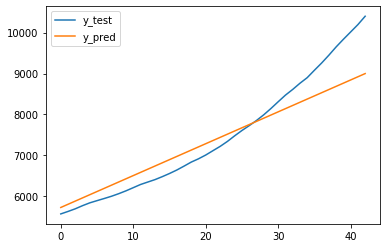

In [50]:
reg_eval.plot()

In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(np.log(y_test.values.ravel()),y_predict)

55008585.4623904

In [53]:
reg_eval['Error']=reg_eval['y_pred']-reg_eval['y_test']
reg_eval['Error_Pctg']=reg_eval['Error']/reg_eval['y_test']
reg_eval.head()

,y_test,y_pred,Error,Error_Pctg
0,5568.509061,5726.235805,157.726743,0.028325
1,5628.995650,5804.148750,175.153101,0.031116
2,5693.703995,5882.061696,188.357701,0.033082
3,5770.150218,5959.974642,189.824424,0.032898
4,5839.043951,6037.887587,198.843636,0.034054


In [54]:
 reg_eval.describe()

,y_test,y_pred,Error,Error_Pctg
count,43.000000,43.000000,43.000000,43.000000
mean,7450.580538,7362.407664,-88.172874,-0.001473
std,1432.849665,978.316926,510.289913,0.058179
min,5568.509061,5726.235805,-1401.470828,-0.134756
25%,6248.575555,6544.321734,-360.914024,-0.042228
50%,7114.526628,7362.407664,176.986779,0.030458
75%,8541.407617,8180.493593,288.635773,0.044059
max,10400.050351,8998.579523,338.660207,0.052202


# logarithmic model

In [62]:
y_log=np.log(y_train)

In [63]:
model2=sm.OLS(y_log,X_train) 
reg2=model.fit()

In [84]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         US_Test_Case1M   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.155e+04
Date:                Mon, 13 Jul 2020   Prob (F-statistic):           1.54e-86
Time:                        15:43:32   Log-Likelihood:                -513.20
No. Observations:                  80   AIC:                             1030.
Df Residuals:                      78   BIC:                             1035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -506.8172     33.165    -15.281      0.000    -572.845    -440.790
TP            77.9156      0.725    107.492      0.000      76.473      79.359
==============================================================================
Omnibus:                       11.962   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.830
Skew:                           0.741   Prob(JB):                     0.000993
Kurtosis:                       4.397   Cond. No.                         90.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Brazil

In [55]:
country_sel=['Brazil']

In [56]:
Covid19_Brazil=Covid19_Model_rs[['TP',country_sel[0]+'_Test_Case1M']]

In [57]:
Covid19_Brazil

,TP,Brazil_Test_Case1M
0,0,0.712951
1,1,0.764888
2,2,0.944306
3,3,1.515612
4,4,1.756410
...,...,...
118,118,8502.662224
119,119,8686.910565
120,120,8804.150925
121,121,8899.931923


In [58]:
X=Covid19_Brazil['TP']
y=Covid19_Brazil.iloc[:,1:2]

In [59]:
X_train=X[:80]
X_test=X[80:]
y_train=y[:80]
y_test=y[80:]

In [60]:
X_train=sm.add_constant(X_train)

In [61]:
model=sm.OLS(y_train,X_train) 
reg=model.fit()

In [62]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Brazil_Test_Case1M   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     279.5
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           1.66e-27
Time:                        17:48:05   Log-Likelihood:                -575.70
No. Observations:                  80   AIC:                             1155.
Df Residuals:                      78   BIC:                             1160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -481.4987     72.439     -6.647      0.000    -625.714    -337.283
TP            26.4680      1.583     16.718      0.000      23.316      29.620
==============================================================================
Omnibus:                        8.066   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.554
Skew:                           0.796   Prob(JB):                       0.0139
Kurtosis:                       2.826   Cond. No.                         90.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
day=55
check=26.46*day+-481.51
check

973.79

In [64]:
y_train[48:56]

,Brazil_Test_Case1M
48,435.334689
49,458.460753
50,480.774713
51,512.852801
52,545.124472
53,597.797882
54,641.056558
55,693.564715


In [65]:
test_d=[(1,i)for i in range(X_test.min(),X_test.max()+1)]

In [66]:
y_predict=reg.predict(test_d)

In [67]:
reg_eval=pd.DataFrame({
    "y_test":y_test.values.ravel(),
    "y_pred":y_predict
})
reg_eval.head()

,y_test,y_pred
0,2622.258581,1635.941617
1,2757.450206,1662.409621
2,2903.463581,1688.877625
3,3049.028411,1715.345629
4,3176.863889,1741.813632


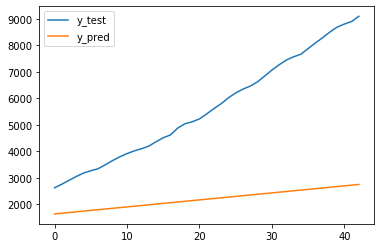

In [68]:
reg_eval.plot()

In [69]:
reg_eval['Error']=reg_eval['y_pred']-reg_eval['y_test']
reg_eval['Error_Pctg']=reg_eval['Error']/reg_eval['y_test']
reg_eval.head()

,y_test,y_pred,Error,Error_Pctg
0,2622.258581,1635.941617,-986.316964,-0.376133
1,2757.450206,1662.409621,-1095.040585,-0.397121
2,2903.463581,1688.877625,-1214.585956,-0.418323
3,3049.028411,1715.345629,-1333.682783,-0.437412
4,3176.863889,1741.813632,-1435.050257,-0.451719


In [70]:
 reg_eval.describe()

,y_test,y_pred,Error,Error_Pctg
count,43.000000,43.000000,43.000000,43.000000
mean,5641.405734,2191.769697,-3449.636038,-0.580989
std,1976.271342,332.346516,1645.168124,0.092315
min,2622.258581,1635.941617,-6349.963310,-0.697985
25%,3964.490963,1913.855657,-4886.663713,-0.664251
50%,5410.431795,2191.769697,-3218.662099,-0.594899
75%,7356.347449,2469.683736,-2050.635307,-0.517213
max,9097.561086,2747.597776,-986.316964,-0.376133


# Colombia

In [71]:
country_sel=['Colombia']

In [72]:
Covid19_Colombia=Covid19_Model_rs[['TP',country_sel[0]+'_Test_Case1M']]

In [73]:
Covid19_Colombia

,TP,Colombia_Test_Case1M
0,0,0.436747
1,1,0.674972
2,2,1.072015
3,3,1.290389
4,4,1.846248
...,...,...
118,118,2659.649653
119,119,2794.703705
120,120,2885.745582
121,121,2986.653968


In [74]:
X=Covid19_Colombia['TP']
y=Covid19_Colombia.iloc[:,1:2]

In [75]:
X_train=X[:80]
X_test=X[80:]
y_train=y[:80]
y_test=y[80:]

In [76]:
X_train=sm.add_constant(X_train)

In [77]:
model=sm.OLS(y_train,X_train) 
reg=model.fit()

In [78]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Colombia_Test_Case1M   R-squared:                       0.854
Model:                              OLS   Adj. R-squared:                  0.852
Method:                   Least Squares   F-statistic:                     456.7
Date:                  Wed, 15 Jul 2020   Prob (F-statistic):           2.41e-34
Time:                          17:48:11   Log-Likelihood:                -442.87
No. Observations:                    80   AIC:                             889.7
Df Residuals:                        78   BIC:                             894.5
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -99.4078     13.768     -7.220      0.000    -126.818     -71.997
TP             6.4308      0.301     21.371      0.000       5.832       7.030
==============================================================================
Omnibus:                        6.789   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                7.001
Skew:                           0.697   Prob(JB):                       0.0302
Kurtosis:                       2.601   Cond. No.                         90.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
day=55
check=6.43*day+-99.40
check

254.24999999999997

In [80]:
y_train[48:56]

,Colombia_Test_Case1M
48,139.084035
49,144.622780
50,152.226147
51,158.281047
52,170.986411
53,177.855249
54,187.721758
55,199.533777


In [81]:
test_d=[(1,i)for i in range(X_test.min(),X_test.max()+1)]

In [82]:
y_predict=reg.predict(test_d)

In [83]:
reg_eval=pd.DataFrame({
    "y_test":y_test.values.ravel(),
    "y_pred":y_predict
})
reg_eval.head()

,y_test,y_pred
0,607.336268,415.055901
1,633.977829,421.486697
2,664.371443,427.917494
3,729.744513,434.348290
4,729.744513,440.779086


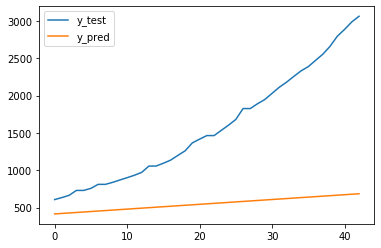

In [84]:
reg_eval.plot()

In [85]:
reg_eval['Error']=reg_eval['y_pred']-reg_eval['y_test']
reg_eval['Error_Pctg']=reg_eval['Error']/reg_eval['y_test']
reg_eval.head()

,y_test,y_pred,Error,Error_Pctg
0,607.336268,415.055901,-192.280367,-0.316596
1,633.977829,421.486697,-212.491131,-0.335171
2,664.371443,427.917494,-236.453949,-0.355906
3,729.744513,434.348290,-295.396223,-0.404794
4,729.744513,440.779086,-288.965426,-0.395982


In [86]:
reg_eval.describe()

,y_test,y_pred,Error,Error_Pctg
count,43.000000,43.000000,43.000000,43.000000
mean,1576.515495,550.102624,-1026.412872,-0.591972
std,736.371612,80.748543,657.065984,0.136670
min,607.336268,415.055901,-2377.577991,-0.776294
25%,916.553073,482.579262,-1528.240571,-0.712131
50%,1464.293241,550.102624,-907.759821,-0.619930
75%,2145.866556,617.625985,-433.973810,-0.473379
max,3062.727337,685.149346,-192.280367,-0.316596
